In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

In [2]:
전data290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0290.txt")

# 전 is the Hangul character for the surname Jeon of the data gatherer!
# it's just my linguistics side being quirky and I'm glad Jupyter Notebook supports Hangul characters like this!

dx290 = 전data290[:,4]
# collect the 4th element of each row in the array into a massive array

dy290 = 전data290[:,5]
# collect the 5th element of each row in the array into a massive array

dz290 = 전data290[:,6]
# collect the 6th element of each row in the array into a massive array

In [3]:
# Code for plotting contours
#from https://gist.github.com/adrn/3993992

import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

#https://book.pythontips.com/en/latest/args_and_kwargs.html
def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    lvl1 = 0.30
    lvl1a = 0.41
    lvl1b = 0.51
    lvl2 = 0.64
    lvl3 = 0.77
    
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl2))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl3))
    
    # You might need to add a few levels
    one_sigma1 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1a))
    one_sigma2 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1b))

    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, one_sigma1, one_sigma2, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = [str(lvl1), str(lvl1a), str(lvl1b), str(lvl2), str(lvl3)][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

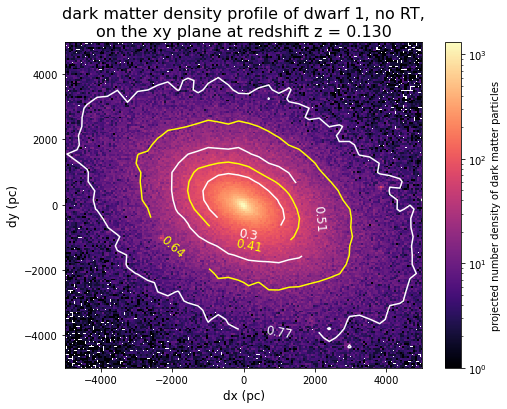

In [4]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx290, dy290, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dy
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx290, dy290, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dy (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the xy plane at redshift z = 0.130', \
          loc='center', fontsize=16)

plt.savefig("0290_dx_dy.png")

plt.show()

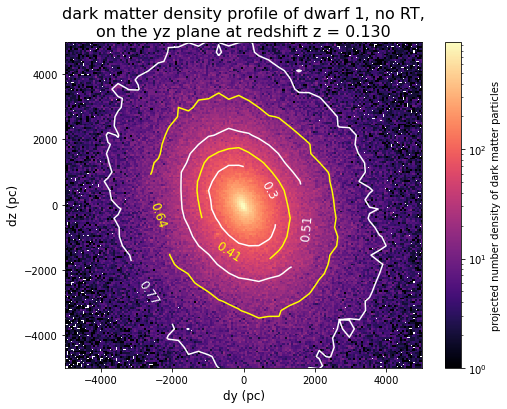

In [5]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dy290, dz290, bins=390, norm=LogNorm(), cmap='magma') # this plots dy and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dy290, dz290, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dy (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the yz plane at redshift z = 0.130', \
          loc='center', fontsize=16)

plt.savefig("0290_dy_dz.png")

plt.show()

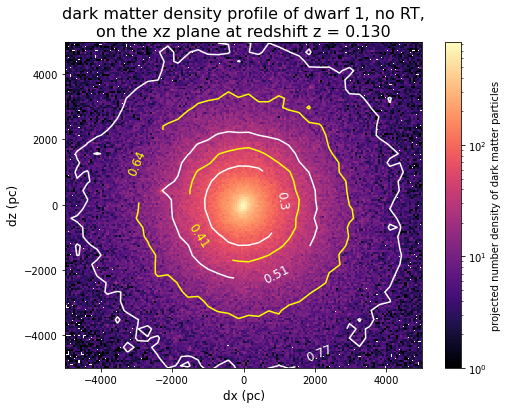

In [6]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx290, dz290, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx290, dz290, 80, 80, ax=ax, colors=['white','yellow','white','yellow','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)

plt.title('dark matter density profile of dwarf 1, no RT,\non the xz plane at redshift z = 0.130', \
          loc='center', fontsize=16)

plt.savefig("0290_dx_dz.png")

plt.show()

In [7]:
dr = 10

In [8]:
'''THIS WORKS WITH 0290'''

r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2)
# this array contains each value of radius range

# the max value in the r array is 11333.935323605565
# with this in mind, I want to find how many particles there are in each spherical shell of dr = 60 pc
# the upper bound of the largest spherical shell would be 11280 pc

rad_array290 = np.arange(10, 11340, dr, dtype=np.int64)
density_profile290 = np.zeros(np.size(rad_array290))
i = 0

for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1

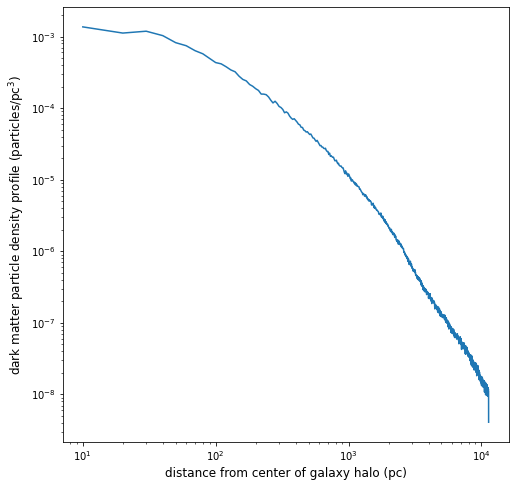

In [9]:
plt.figure(figsize=(8,8))

plt.plot(rad_array290, density_profile290)
plt.xlabel('distance from center of galaxy halo (pc)', fontsize=12)
plt.ylabel(r'dark matter particle density profile (particles/pc$^3$)', fontsize=12) # using LATEX here!
plt.xscale('log')
plt.yscale('log')

plt.show()

In [10]:
'''THIS WORKS WITH 0270'''

전data270 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0270.txt")

dx270 = 전data270[:,4]
dy270 = 전data270[:,5]
dz270 = 전data270[:,6]

r270 = np.sqrt(dx270**2 + dy270**2 + dz270**2) # max: 10353.728025429693, closest to 10380

rad_array270 = np.arange(10, 10380, dr, dtype=np.int64)
density_profile270 = np.zeros(np.size(rad_array270))
i = 0

for radius_value in rad_array270:
    particles = np.where((r270 > radius_value) & (r270 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile270[i] = how_many_particles / shell_volume
    i += 1

In [11]:
'''THIS WORKS WITH 0250'''

전data250 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0250.txt")

dx250 = 전data250[:,4]
dy250 = 전data250[:,5]
dz250 = 전data250[:,6]

r250 = np.sqrt(dx250**2 + dy250**2 + dz250**2) # max: 9045.751391493965, closest to 9060

rad_array250 = np.arange(10, 9060, dr, dtype=np.int64)
density_profile250 = np.zeros(np.size(rad_array250))
i = 0

for radius_value in rad_array250:
    particles = np.where((r250 > radius_value) & (r250 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile250[i] = how_many_particles / shell_volume
    i += 1

In [12]:
'''THIS WORKS WITH 0230'''

전data230 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0230.txt")

dx230 = 전data230[:,4]
dy230 = 전data230[:,5]
dz230 = 전data230[:,6]

r230 = np.sqrt(dx230**2 + dy230**2 + dz230**2) # max: 7746.81840150115, closest to 7800

rad_array230 = np.arange(10, 7800, dr, dtype=np.int64)
density_profile230 = np.zeros(np.size(rad_array230))
i = 0

for radius_value in rad_array230:
    particles = np.where((r230 > radius_value) & (r230 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile230[i] = how_many_particles / shell_volume
    i += 1

In [13]:
'''THIS WORKS WITH 0210'''

전data210 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0210.txt")

dx210 = 전data210[:,4]
dy210 = 전data210[:,5]
dz210 = 전data210[:,6]

r210 = np.sqrt(dx210**2 + dy210**2 + dz210**2) # max: 6435.552191577678, closest to 6480

rad_array210 = np.arange(10, 6480, dr, dtype=np.int64)
density_profile210 = np.zeros(np.size(rad_array210))
i = 0

for radius_value in rad_array210:
    particles = np.where((r210 > radius_value) & (r210 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile210[i] = how_many_particles / shell_volume
    i += 1

In [14]:
'''THIS WORKS WITH 0190'''

전data190 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0190.txt")

dx190 = 전data190[:,4]
dy190 = 전data190[:,5]
dz190 = 전data190[:,6]

r190 = np.sqrt(dx190**2 + dy190**2 + dz190**2) # max: 5101.290332034631, closest to 5160

rad_array190 = np.arange(10, 5160, dr, dtype=np.int64)
density_profile190 = np.zeros(np.size(rad_array190))
i = 0

for radius_value in rad_array190:
    particles = np.where((r190 > radius_value) & (r190 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile190[i] = how_many_particles / shell_volume
    i += 1

In [15]:
'''THIS WORKS WITH 0170'''

전data170 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0170.txt")

dx170 = 전data170[:,4]
dy170 = 전data170[:,5]
dz170 = 전data170[:,6]

r170 = np.sqrt(dx170**2 + dy170**2 + dz170**2) # max: 4540.972105566934, closest to 4560

rad_array170 = np.arange(10, 4560, dr, dtype=np.int64)
density_profile170 = np.zeros(np.size(rad_array170))
i = 0

for radius_value in rad_array170:
    particles = np.where((r170 > radius_value) & (r170 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile170[i] = how_many_particles / shell_volume
    i += 1

In [16]:
'''THIS WORKS WITH 0150'''

전data150 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0150.txt")

dx150 = 전data150[:,4]
dy150 = 전data150[:,5]
dz150 = 전data150[:,6]

r150 = np.sqrt(dx150**2 + dy150**2 + dz150**2) # max: 2712.6740860997293, closest to 2760

rad_array150 = np.arange(10, 2760, dr, dtype=np.int64)
density_profile150 = np.zeros(np.size(rad_array150))
i = 0

for radius_value in rad_array150:
    particles = np.where((r150 > radius_value) & (r150 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile150[i] = how_many_particles / shell_volume
    i += 1

In [17]:
'''THIS WORKS WITH 0130'''

전data130 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0130.txt")

dx130 = 전data130[:,4]
dy130 = 전data130[:,5]
dz130 = 전data130[:,6]

r130 = np.sqrt(dx130**2 + dy130**2 + dz130**2) # max: 2218.0197067752147, closest to 2220

rad_array130 = np.arange(10, 2220, dr, dtype=np.int64)
density_profile130 = np.zeros(np.size(rad_array130))
i = 0

for radius_value in rad_array130:
    particles = np.where((r130 > radius_value) & (r130 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile130[i] = how_many_particles / shell_volume
    i += 1

In [18]:
'''THIS WORKS WITH 0110'''

전data110 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0110.txt")

dx110 = 전data110[:,4]
dy110 = 전data110[:,5]
dz110 = 전data110[:,6]

r110 = np.sqrt(dx110**2 + dy110**2 + dz110**2) # max: 1431.4151120109009, closest to 1440

rad_array110 = np.arange(10, 1440, dr, dtype=np.int64)
density_profile110 = np.zeros(np.size(rad_array110))
i = 0

for radius_value in rad_array110:
    particles = np.where((r110 > radius_value) & (r110 < (radius_value + dr)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + dr)**3 - radius_value**3)
    density_profile110[i] = how_many_particles / shell_volume
    i += 1

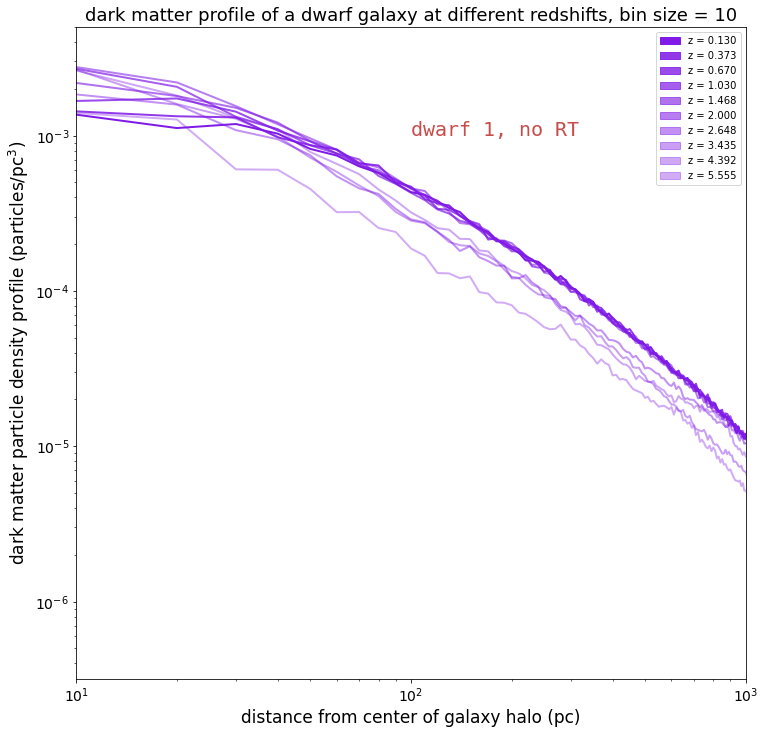

In [20]:
'''OVERPLOT ALL THE 12 .txt FILES!!!!!!!!'''

plt.figure(figsize=(12,12))

plt.plot(rad_array290, density_profile290, color=(0.5, 0.1, 0.9, 1), linewidth=2)
plt.plot(rad_array270, density_profile270, color=(0.5, 0.1, 0.9, 0.86), linewidth=2)
plt.plot(rad_array250, density_profile250, color=(0.5, 0.1, 0.9, 0.79), linewidth=2)
plt.plot(rad_array230, density_profile230, color=(0.5, 0.1, 0.9, 0.70), linewidth=2)
plt.plot(rad_array210, density_profile210, color=(0.5, 0.1, 0.9, 0.62), linewidth=2)
plt.plot(rad_array190, density_profile190, color=(0.5, 0.1, 0.9, 0.56), linewidth=2)
plt.plot(rad_array170, density_profile170, color=(0.5, 0.1, 0.9, 0.48), linewidth=2)
plt.plot(rad_array150, density_profile150, color=(0.5, 0.1, 0.9, 0.42), linewidth=2)
plt.plot(rad_array130, density_profile130, color=(0.5, 0.1, 0.9, 0.38), linewidth=2)
plt.plot(rad_array110, density_profile110, color=(0.5, 0.1, 0.9, 0.36), linewidth=2)

purple10 = mpatches.Patch(color=(0.5, 0.1, 0.9, 1), label='z = 0.130')
purple9 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.86), label='z = 0.373')
purple8 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.79), label='z = 0.670')
purple7 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.70), label='z = 1.030')
purple6 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.62), label='z = 1.468')
purple5 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.56), label='z = 2.000')
purple4 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.48), label='z = 2.648')
purple3 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.42), label='z = 3.435')
purple2 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.38), label='z = 4.392')
purple1 = mpatches.Patch(color=(0.5, 0.1, 0.9, 0.36), label='z = 5.555')

plt.legend(handles=[purple10, purple9, purple8, purple7, purple6, purple5, purple4, purple3, purple2, purple1])

plt.xlabel('distance from center of galaxy halo (pc)', fontsize=17)
plt.ylabel(r'dark matter particle density profile (particles/pc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10,10**3)
plt.ylim(10**-6.5,10**-2.3) 
plt.xscale('log')
plt.yscale('log')

plt.title('dark matter profile of a dwarf galaxy at different redshifts, bin size = ' + str(dr), \
          loc='center', fontsize=18)
plt.text(10**2, 10**-3, 'dwarf 1, no RT', fontsize=20, color='#C74C4A', fontfamily='monospace')

plt.show()